# Full Experiment with CatBoost Models

This notebook runs a complete experiment using all available features with both CatBoostClassifier and CatBoostRanker models.

In [1]:
import os
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

from lavka_recsys.config import Config
from lavka_recsys.experiment import Experiment
from lavka_recsys.data_loader import DataLoader
from lavka_recsys.feature_factory import CachedFeatureFactory
from lavka_recsys.model_factory import ModelFactory
from lavka_recsys.custom_logging import setup_logging

In [2]:
setup_logging()

<Logger lavka_recsys (DEBUG)>

# Baseline Experiments

First, let's see how well a model that outputs random predictions does.

In [3]:
config = Config.load('default_config.yaml')
config.set('model.type', 'random_baseline')  # Set model type

# Create experiment
random_experiment = Experiment("random_baseline", config)

# Setup and run
start_time = time.time()
random_experiment.setup()
random_results = random_experiment.run()
random_time = time.time() - start_time

# Print metrics
print(f"\nRandom Baseline Results (completed in {random_time:.2f} seconds):")
for metric, value in random_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

2025-05-05 12:01:03,634 - lavka_recsys.Experiment(random_baseline_f11639) - INFO - Initialized experiment: random_baseline_f11639
2025-05-05 12:01:03,643 - lavka_recsys.Experiment(random_baseline_f11639) - INFO - Config saved: results/random_baseline_f11639_config.json
2025-05-05 12:01:03,645 - lavka_recsys.Experiment(random_baseline_f11639) - INFO - Setting up experiment environment...
2025-05-05 12:01:03,646 - lavka_recsys.DataLoader - INFO - Loading training data from ../../data/lavka/train.parquet


2025-05-05 12:01:03,982 - lavka_recsys.DataLoader - INFO - Loading test data from ../../data/lavka/test.parquet
2025-05-05 12:01:04,355 - lavka_recsys.DataLoader - INFO - Holdout Split:
2025-05-05 12:01:04,383 - lavka_recsys.DataLoader - INFO -   train: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 12:01:04,387 - lavka_recsys.DataLoader - INFO -   holdout: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 12:01:04,388 - lavka_recsys.Experiment(random_baseline_f11639) - INFO - Setup complete.
2025-05-05 12:01:04,388 - lavka_recsys.Experiment(random_baseline_f11639) - INFO - Starting experiment run...
2025-05-05 12:01:04,884 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 12:01:04,906 - lavka_recsys.DataLoader - INFO -   train_history: 2022-12-31 18:46:42 → 2023-11-04 17:16:23 (12_082_523 rows, 307 days)
2025-05-05 12:01:04,910 - lavka_recsys.DataLoader - INFO -   train_target: 2023-11-04 18:19:12 → 2023-12-0

## CatBoost Classifier Experiment

Run an experiment with CatBoost Classifier.

In [10]:
# Configure for CatBoost classifier
config = Config.load('default_config.yaml')

classifier_config = config.copy()  # Clone the config
classifier_config.set('model.type', 'catboost_classifier')  # Set model type

# Create experiment
classifier_experiment = Experiment("catboost_classifier", classifier_config)

# Setup and run
start_time = time.time()
classifier_experiment.setup()
classifier_results = classifier_experiment.run()
classifier_time = time.time() - start_time

# Print metrics
print(f"\nCatBoost Classifier Results (completed in {classifier_time:.2f} seconds):")
for metric, value in classifier_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

# Print feature importance
if 'feature_importance' in classifier_results:
    print("\nTop 10 Important Features:")
    top_features = sorted(classifier_results['feature_importance'].items(), 
                        key=lambda x: x[1], reverse=True)[:10]
    for feature, importance in top_features:
        print(f"  {feature}: {importance:.6f}")

2025-05-05 11:40:51,656 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Initialized experiment: catboost_classifier_79beb2


2025-05-05 11:40:51,666 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Config saved: results/catboost_classifier_79beb2_config.json
2025-05-05 11:40:51,920 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Setting up experiment environment...
2025-05-05 11:40:51,935 - lavka_recsys.DataLoader - INFO - Loading training data from ../../data/lavka/train.parquet
2025-05-05 11:40:52,158 - lavka_recsys.DataLoader - INFO - Loading test data from ../../data/lavka/test.parquet
2025-05-05 11:40:52,386 - lavka_recsys.DataLoader - INFO - Holdout Split:
2025-05-05 11:40:52,439 - lavka_recsys.DataLoader - INFO -   train: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 11:40:52,443 - lavka_recsys.DataLoader - INFO -   holdout: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 11:40:52,445 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Setup complete.
2025-05-05 11:40:52,446 - lavka_recsys.Experim

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

2025-05-05 11:41:20,975 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Training completed in 25.35s
2025-05-05 11:41:20,979 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Evaluating on holdout.
2025-05-05 11:41:21,017 - lavka_recsys.CachedFeatureFactory - INFO - Generating feature batch
2025-05-05 11:41:21,018 - lavka_recsys.FeatureFactory - INFO - Invoking feature generators: source_type, count_purchase_user_product
2025-05-05 11:41:21,237 - lavka_recsys.FeatureFactory - INFO - Joined features
2025-05-05 11:41:21,239 - lavka_recsys.FeatureFactory - INFO - All column names: {'source_type', 'count_purchase_u_p'}
2025-05-05 11:41:21,240 - lavka_recsys.FeatureFactory - INFO - All categorical column names: ['source_type']
2025-05-05 11:41:22,504 - lavka_recsys.CatBoostClassifierModel - INFO - Converting 'source_type' to string for CatBoost
2025-05-05 11:41:35,187 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Run results saved: results/catboo

## CatBoost Ranker Experiment

Run an experiment with CatBoost Ranker.

In [ ]:
# Configure for CatBoost ranker
config = Config.load('default_config.yaml')

ranker_config = config.copy()  # Clone the config
ranker_config.set('model.type', 'catboost_ranker')  # Set model type

# Create experiment
ranker_experiment = Experiment("catboost_ranker", ranker_config)

# Setup and run
start_time = time.time()
ranker_experiment.setup()
ranker_results = ranker_experiment.run()
ranker_time = time.time() - start_time

# Print metrics
print(f"\nCatBoost Ranker Results (completed in {ranker_time:.2f} seconds):")
for metric, value in ranker_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

# Print feature importance
if 'feature_importance' in ranker_results:
    print("\nTop 10 Important Features:")
    top_features = sorted(ranker_results['feature_importance'].items(), 
                        key=lambda x: x[1], reverse=True)[:10]
    for feature, importance in top_features:
        print(f"  {feature}: {importance:.6f}")

## 5. Create Kaggle Submissions

In [11]:
classifier_experiment.config.set('model.config.catboost_classifier.iterations', 18)
classifier_experiment.create_submission()

2025-05-05 11:46:38,903 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Computing predictions...
2025-05-05 11:46:38,910 - lavka_recsys.DataLoader - INFO - Holdout data merged back into training data.
2025-05-05 11:46:38,946 - lavka_recsys.DataLoader - INFO - Validation Split:
2025-05-05 11:46:38,974 - lavka_recsys.DataLoader - INFO -   history: 2022-12-31 18:46:42 → 2024-01-03 17:31:52 (15_070_276 rows, 367 days)
2025-05-05 11:46:38,978 - lavka_recsys.DataLoader - INFO -   target: 2024-01-03 17:56:48 → 2024-02-02 17:34:51 (1_438_338 rows, 29 days)
2025-05-05 11:46:39,137 - lavka_recsys.CachedFeatureFactory - INFO - Using cached feature batch
2025-05-05 11:46:39,139 - lavka_recsys.ModelFactory - INFO - Creating catboost_classifier model with params: {'iterations': 18, 'learning_rate': 0.1, 'depth': 6, 'l2_leaf_reg': 3.0, 'verbose': 10, 'loss_function': 'Logloss', 'eval_metric': 'NDCG:top=10', 'early_stopping_rounds': 50, 'task_type': 'CPU', 'thread_count': -1}
2025-05-05

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

2025-05-05 11:46:44,954 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Training completed in 5.81s
2025-05-05 11:46:44,988 - lavka_recsys.DataLoader - INFO - Holdout data merged back into training data.
2025-05-05 11:46:45,018 - lavka_recsys.CachedFeatureFactory - INFO - Generating feature batch
2025-05-05 11:46:45,019 - lavka_recsys.FeatureFactory - INFO - Invoking feature generators: source_type, count_purchase_user_product
2025-05-05 11:46:45,131 - lavka_recsys.FeatureFactory - INFO - Joined features
2025-05-05 11:46:45,132 - lavka_recsys.FeatureFactory - INFO - All column names: {'source_type', 'count_purchase_u_p'}
2025-05-05 11:46:45,133 - lavka_recsys.FeatureFactory - INFO - All categorical column names: ['source_type']
2025-05-05 11:46:45,171 - lavka_recsys.CatBoostClassifierModel - INFO - Converting 'source_type' to string for CatBoost
2025-05-05 11:46:45,340 - lavka_recsys.Experiment(catboost_classifier_79beb2) - INFO - Submission saved: results/submissions/ca

index,request_id
u32,u64
177,3019379937258044704
674,14439634211702568835
1705,2091226547450692861
2161,10512952231685422131
3452,14439634211702568835
…,…
289610,6412934858354714202
289968,12024900402335366995
290271,8848683844895172842


## 6. Compare Models

In [17]:
# Gather metrics from both models for comparison
metrics_comparison = {
    'Model': ['CatBoost Classifier', 'CatBoost Ranker'],
    'Training Time (s)': [classifier_time, ranker_time]
}

# Add all metrics to the comparison
all_metrics = set(list(classifier_results['metrics'].keys()) + list(ranker_results['metrics'].keys()))
for metric in all_metrics:
    metrics_comparison[metric] = [
        classifier_results['metrics'].get(metric, float('nan')),
        ranker_results['metrics'].get(metric, float('nan'))
    ]

# Convert to DataFrame and display
metrics_df = pd.DataFrame(metrics_comparison)
print("Model Comparison:")
display(metrics_df)

# Save comparison to results directory
metrics_df.to_csv(f"{results_dir}/model_comparison.csv", index=False)

# Also save as readable markdown table
with open(f"{results_dir}/model_comparison.md", 'w') as f:
    f.write(metrics_df.to_markdown(index=False, floatfmt=".4f"))

Model Comparison:


,Model,Training Time (s),auc,ndcg@10
0,CatBoost Classifier,414.968725,0.843459,0.455186
1,CatBoost Ranker,812.030756,0.507122,0.314312


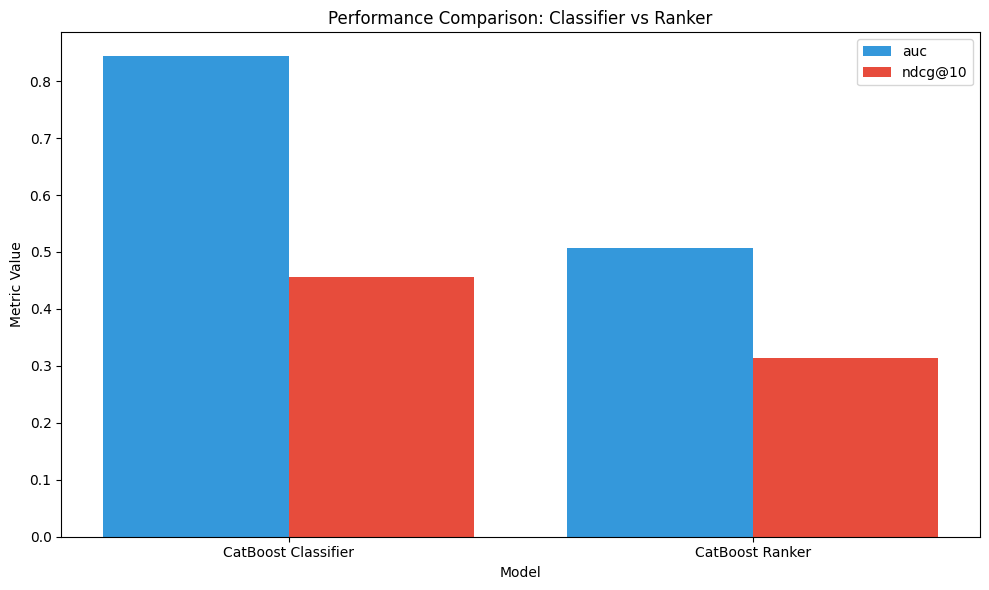

In [18]:
# Visualize metrics comparison
metrics_to_plot = [m for m in all_metrics if m in ['auc', 'ndcg@10', 'logloss']]
if metrics_to_plot:
    plt.figure(figsize=(10, 6))
    x = range(len(metrics_comparison['Model']))
    colors = ['#3498db', '#e74c3c']
    width = 0.8 / len(metrics_to_plot)
    
    for i, metric in enumerate(metrics_to_plot):
        if metric in metrics_comparison:
            plt.bar([p + width*i - width*(len(metrics_to_plot)-1)/2 for p in x], 
                    metrics_comparison[metric], 
                    width=width, 
                    label=metric,
                    color=colors[i % len(colors)])
    
    plt.xlabel('Model')
    plt.ylabel('Metric Value')
    plt.title('Performance Comparison: Classifier vs Ranker')
    plt.xticks(x, metrics_comparison['Model'])
    plt.legend()
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{results_dir}/metrics_comparison.png", dpi=300)
    plt.show()

## 7. Feature Importance Comparison

Top 20 Features by Average Importance:


,Feature,Classifier Importance,Ranker Importance,Average Importance
0,day_of_week,0.430708,76.877028,38.653868
1,source_type,58.305537,3.002235,30.653886
2,hour_of_day,1.466124,13.414695,7.440410
3,purchase_view_ratio,8.873916,0.592308,4.733112
4,npmi_cf_score,8.072921,0.442717,4.257819
5,svd_cf_score,6.451163,0.414012,3.432587
6,cf_score,5.679996,0.626020,3.153008
7,city_name,2.079124,2.181367,2.130246
8,puresvd_cf_score,3.644003,0.430520,2.037261
9,product_total_views,3.010610,0.541515,1.776062


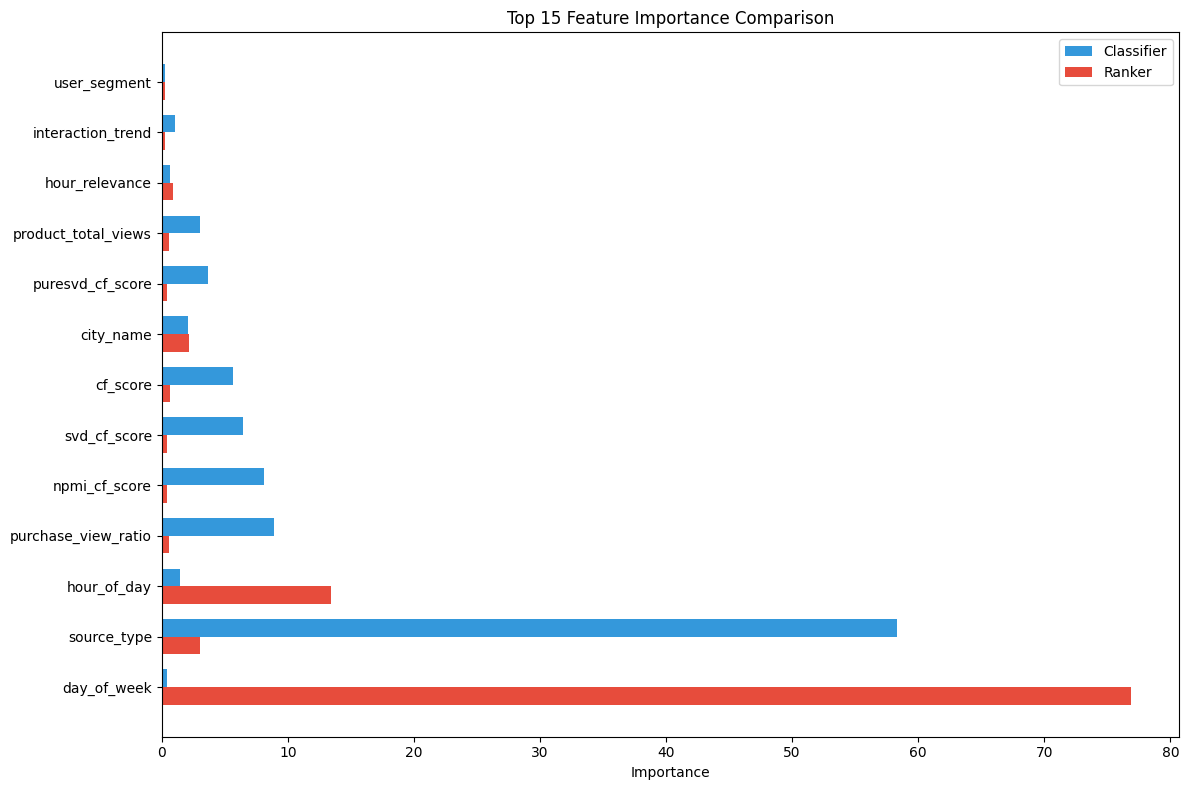

In [19]:
# Compare feature importance between models
if 'feature_importance' in classifier_results and 'feature_importance' in ranker_results:
    # Get all features from both models
    all_features = set(list(classifier_results['feature_importance'].keys()) + 
                        list(ranker_results['feature_importance'].keys()))
    
    # Create comparison dataframe
    fi_comparison = {'Feature': []}
    fi_comparison['Classifier Importance'] = []
    fi_comparison['Ranker Importance'] = []
    
    for feature in all_features:
        fi_comparison['Feature'].append(feature)
        fi_comparison['Classifier Importance'].append(
            classifier_results['feature_importance'].get(feature, 0))
        fi_comparison['Ranker Importance'].append(
            ranker_results['feature_importance'].get(feature, 0))
        
    # Convert to DataFrame and sort by average importance
    fi_df = pd.DataFrame(fi_comparison)
    fi_df['Average Importance'] = (fi_df['Classifier Importance'] + fi_df['Ranker Importance']) / 2
    fi_df = fi_df.sort_values('Average Importance', ascending=False).reset_index(drop=True)
    
    # Save to results directory
    fi_df.to_csv(f"{results_dir}/feature_importance_comparison.csv", index=False)
    
    # Display top features
    print("Top 20 Features by Average Importance:")
    display(fi_df.head(20))
    
    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_n = 15
    top_features = fi_df.head(top_n)
    
    x = range(len(top_features))
    width = 0.35
    
    plt.barh([p + width/2 for p in x], top_features['Classifier Importance'], 
            height=width, label='Classifier', color='#3498db')
    plt.barh([p - width/2 for p in x], top_features['Ranker Importance'], 
            height=width, label='Ranker', color='#e74c3c')
    
    plt.yticks(x, top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Feature Importance Comparison')
    plt.legend()
    plt.tight_layout()
    
    # Save figure
    plt.savefig(f"{results_dir}/feature_importance_comparison.png", dpi=300)
    plt.show()

## 8. Save Experiment Configuration and Results

In [20]:
# Combine all results
experiment_results = {
    'timestamp': timestamp,
    'classifier': {
        'config': classifier_config.to_dict(),
        'metrics': classifier_results['metrics'],
        'training_time': classifier_time
    },
    'ranker': {
        'config': ranker_config.to_dict(),
        'metrics': ranker_results['metrics'],
        'training_time': ranker_time
    },
    'feature_counts': len(all_features),
    'experiment_name': experiment_name
}

# Save as JSON
with open(f"{results_dir}/experiment_results.json", 'w') as f:
    json.dump(experiment_results, f, indent=2, default=str)

print(f"Experiment complete. All results saved to {results_dir}/")

Experiment complete. All results saved to results/full_experiment_20250414_192354/


## 9. Expanding Window Experiment

Run a classifier experiment with the expanding window approach to see how performance improves with more training data.

In [22]:
# Configure for expanding window experiment
expanding_config = config.copy()
expanding_config.set('model.type', 'catboost')
expanding_config.set('training.split_type', 'expanding_window')
expanding_config.set('training.step_days', 30)  # Use 30-day steps
expanding_config.set('training.max_splits', 5)  # Limit to 5 splits for faster execution
expanding_config.set('training.target_days', 30)  # 30-day target window
expanding_config.set('training.validation_days', 30)  # 30-day validation window

# Create a specific results directory
expanding_results_dir = f"{results_dir}/expanding_window"
os.makedirs(expanding_results_dir, exist_ok=True)
expanding_config.set('output.results_dir', expanding_results_dir)

# Create experiment
expanding_experiment = Experiment("expanding_window_experiment", expanding_config)
expanding_experiment.data_loader = custom_data_loader

# Setup and run
print("Running Expanding Window Experiment...")
start_time = time.time()
expanding_experiment.setup()
expanding_results = expanding_experiment.run()
expanding_time = time.time() - start_time

# Print metrics
print(f"\nExpanding Window Experiment Results (completed in {expanding_time:.2f} seconds):")
for metric, value in expanding_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

# Print feature importance
if 'feature_importance' in expanding_results:
    print("\nTop 10 Important Features:")
    top_features = sorted(expanding_results['feature_importance'].items(), 
                       key=lambda x: x[1], reverse=True)[:10]
    for feature, importance in top_features:
        print(f"  {feature}: {importance:.6f}")

# Save results for comparison
expanding_metrics = expanding_results['metrics']

2025-04-14 20:03:51,828 - lavka_recsys.CachedFeatureFactory - INFO - Using feature cache directory: results/feature_cache
2025-04-14 20:03:51,839 - lavka_recsys.Experiment(expanding_window_experiment_707eab) - INFO - Created experiment directory: results/full_experiment_20250414_192354/expanding_window/expanding_window_experiment_707eab_20250414_200351
2025-04-14 20:03:51,845 - lavka_recsys.Experiment(expanding_window_experiment_707eab) - INFO - Saved configuration to results/full_experiment_20250414_192354/expanding_window/expanding_window_experiment_707eab_config.json
Running Expanding Window Experiment...
2025-04-14 20:03:51,847 - lavka_recsys.Experiment(expanding_window_experiment_707eab) - INFO - Setting up feature selector
2025-04-14 20:03:51,848 - lavka_recsys.FeatureSelector - INFO - Generated cache key: 43a0a9b0e9c1c093fb352ae7d50cae9d
2025-04-14 20:03:51,848 - lavka_recsys.FeatureSelector - INFO - Feature selection method: importance, n_features: 10
2025-04-14 20:03:51,850 - 

Processing splits:   0%|          | 0/5 [00:00<?, ?it/s]

2025-04-14 20:03:57,054 - lavka_recsys.Trainer - INFO - 
Processing split 1/5
2025-04-14 20:03:57,058 - lavka_recsys.Trainer - INFO -   History: 2022-12-31 18:46:42 to 2023-11-01 20:22:20 (11918739 records)
2025-04-14 20:03:57,059 - lavka_recsys.Trainer - INFO -   Train: 2023-11-01 21:50:10 to 2023-12-01 20:23:15 (1525403 records)
2025-04-14 20:03:57,425 - lavka_recsys.CachedFeatureFactory - INFO - Features loaded from cache in 0.36s: results/feature_cache/features_9bd12f65880b0b424784d3990e9f563d.pkl
2025-04-14 20:03:57,426 - lavka_recsys.CachedFeatureFactory - INFO - Applying feature selection to cached batch features...
2025-04-14 20:03:57,427 - lavka_recsys.CachedFeatureFactory - INFO - Applied feature selection: reduced from 13 to 13 columns
2025-04-14 20:03:57,428 - lavka_recsys.Trainer - INFO -   Train feature generation: 0.37s, shape: (1501454, 13)
2025-04-14 20:03:57,429 - lavka_recsys.Trainer - INFO -   Validation: 2023-12-01 20:58:30 to 2023-12-31 20:53:38 (1510274 records)


In [28]:
metrics_df.loc[2] = [
    'Classifier + Expanding Window',
    expanding_time,
    expanding_metrics.get('auc', float('nan')),
    expanding_metrics.get('ndcg@10', float('nan')),
]
display(metrics_df)

,Model,Training Time (s),auc,ndcg@10
0,CatBoost Classifier,414.968725,0.843459,0.455186
1,CatBoost Ranker,812.030756,0.507122,0.314312
2,Classifier + Expanding Window,1792.912021,0.845468,0.457691


In [29]:
# Create Kaggle submissions for both models
expanding_submission = expanding_experiment.create_kaggle_submission()

# Save submissions
expanding_submission.write_csv(f"{expanding_results_dir}/submission.csv")

print(f"Saved submissions to {expanding_results_dir}/submission.csv")

2025-04-14 20:47:26,417 - lavka_recsys.Experiment(expanding_window_experiment_707eab) - INFO - Using last trained model for Kaggle submission
2025-04-14 20:47:26,420 - lavka_recsys.Experiment(expanding_window_experiment_707eab) - INFO - Generating features for Kaggle test data
2025-04-14 20:47:27,249 - lavka_recsys.CachedFeatureFactory - INFO - Features loaded from cache in 0.81s: results/feature_cache/features_c4a0a5b13e3b47dbd8f6c181ef04fbd4.pkl
2025-04-14 20:47:27,249 - lavka_recsys.CachedFeatureFactory - INFO - Applying feature selection to cached features...
2025-04-14 20:47:27,251 - lavka_recsys.CachedFeatureFactory - INFO - Applied feature selection: reduced from 13 to 13 columns
2025-04-14 20:47:27,251 - lavka_recsys.Experiment(expanding_window_experiment_707eab) - INFO - Making predictions for Kaggle submission
2025-04-14 20:47:27,498 - lavka_recsys.CatBoostModel - INFO - Converting categorical column for prediction: source_type
2025-04-14 20:47:27,508 - lavka_recsys.CatBoostM

In [30]:
experiment_results['expanding_window'] = {
    'config': expanding_config.to_dict(),
    'metrics': expanding_results['metrics'],
    'training_time': expanding_time
}

# Save as JSON
with open(f"{results_dir}/experiment_results.json", 'w') as f:
    json.dump(experiment_results, f, indent=2, default=str)

print(f"Experiment complete. All results saved to {results_dir}/")

Experiment complete. All results saved to results/full_experiment_20250414_192354/


## 10. Hyperparameter Optimization

Run hyperparameter optimization for the classifier model to find the best parameters.

In [31]:
# Configure for hyperparameter optimization
tuning_config = config.copy()
tuning_config.set('model.type', 'catboost')
tuning_config.set('experiment.type', 'tuning')
tuning_config.set('experiment.use_hyperparameter_tuning', True)

# Split configuration
tuning_config.set('training.split_type', 'standard')
tuning_config.set('training.validation_days', 30)  # 30-day validation window
tuning_config.set('training.target_days', 30)  # 30-day target window

# Set hyperparameter search space 
tuning_config.set('hyperparameter_tuning.n_trials', 10)  # Number of trials to run
tuning_config.set('hyperparameter_tuning.timeout', 1800)  # 30 minutes timeout

# Set up results directory
tuning_results_dir = f"{results_dir}/hyperparameter_tuning"
os.makedirs(tuning_results_dir, exist_ok=True)
tuning_config.set('output.results_dir', tuning_results_dir)

# Create and run tuning experiment
tuning_experiment = Experiment("hyperparameter_tuning_experiment", tuning_config)
tuning_experiment.data_loader = custom_data_loader

# Setup and run
print("Running Hyperparameter Tuning Experiment...")
start_time = time.time()
tuning_experiment.setup()
tuning_results = tuning_experiment.run()
tuning_time = time.time() - start_time

# Print metrics
print(f"\nHyperparameter Tuning Results (completed in {tuning_time:.2f} seconds):")
for metric, value in tuning_results['metrics'].items():
    print(f"  {metric}: {value:.6f}")

# Print best parameters
if 'best_params' in tuning_results:
    print("\nBest Parameters:")
    for param, value in tuning_results['best_params'].items():
        print(f"  {param}: {value}")

# Save best parameters for future use
best_params = tuning_results.get('best_params', {})

2025-04-14 20:55:23,648 - lavka_recsys.CachedFeatureFactory - INFO - Using feature cache directory: results/feature_cache
2025-04-14 20:55:23,658 - lavka_recsys.Experiment(hyperparameter_tuning_experiment_aa34c9) - INFO - Created experiment directory: results/full_experiment_20250414_192354/hyperparameter_tuning/hyperparameter_tuning_experiment_aa34c9_20250414_205523
2025-04-14 20:55:23,665 - lavka_recsys.Experiment(hyperparameter_tuning_experiment_aa34c9) - INFO - Saved configuration to results/full_experiment_20250414_192354/hyperparameter_tuning/hyperparameter_tuning_experiment_aa34c9_config.json
Running Hyperparameter Tuning Experiment...
2025-04-14 20:55:23,666 - lavka_recsys.HyperparameterTuner - INFO - Hyperparameter tuning will use standard split type
2025-04-14 20:55:23,668 - lavka_recsys.Experiment(hyperparameter_tuning_experiment_aa34c9) - INFO - Setting up feature selector
2025-04-14 20:55:23,669 - lavka_recsys.FeatureSelector - INFO - Generated cache key: 43a0a9b0e9c1c093f

[I 2025-04-14 20:55:23,686] A new study created in memory with name: no-name-8bfd0add-0c0f-4fa6-b524-14f263753511


2025-04-14 20:55:23,699 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.014138774507702763, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1.3857013639233293}
2025-04-14 20:55:23,699 - lavka_recsys.HyperparameterTuner - INFO - Trial 0: Testing parameters {'learning_rate': 0.014138774507702763, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1.3857013639233293}
2025-04-14 20:55:23,701 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 20:55:23,708 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 20:55:23,709 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_639d339aa550.pkl
2025-04-14 20:55:23,710 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 20:55:23,714 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 20:55:23,715 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 2

[I 2025-04-14 20:56:11,439] Trial 0 finished with value: 0.8100547717774835 and parameters: {'learning_rate': 0.014138774507702763, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1.3857013639233293}. Best is trial 0 with value: 0.8100547717774835.


2025-04-14 20:56:11,442 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.013987327669565914, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 2.1357428940908996}
2025-04-14 20:56:11,442 - lavka_recsys.HyperparameterTuner - INFO - Trial 1: Testing parameters {'learning_rate': 0.013987327669565914, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 2.1357428940908996}
2025-04-14 20:56:11,445 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 20:56:11,450 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 20:56:11,453 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_76c7789aa914.pkl
2025-04-14 20:56:11,454 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 20:56:11,458 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 20:56:11,459 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 2

[I 2025-04-14 20:56:56,124] Trial 1 finished with value: 0.8117281273277767 and parameters: {'learning_rate': 0.013987327669565914, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 2.1357428940908996}. Best is trial 1 with value: 0.8117281273277767.


2025-04-14 20:56:56,127 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.14981598587388306, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 8.532282046555537}
2025-04-14 20:56:56,128 - lavka_recsys.HyperparameterTuner - INFO - Trial 2: Testing parameters {'learning_rate': 0.14981598587388306, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 8.532282046555537}
2025-04-14 20:56:56,131 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 20:56:56,138 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 20:56:56,139 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_b4b7f8b0e728.pkl
2025-04-14 20:56:56,140 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 20:56:56,145 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 20:56:56,146 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 20:56

[I 2025-04-14 20:58:54,364] Trial 2 finished with value: 0.8431229664000697 and parameters: {'learning_rate': 0.14981598587388306, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 8.532282046555537}. Best is trial 2 with value: 0.8431229664000697.


2025-04-14 20:58:54,368 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.23544707106224802, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1.2004290170869596}
2025-04-14 20:58:54,368 - lavka_recsys.HyperparameterTuner - INFO - Trial 3: Testing parameters {'learning_rate': 0.23544707106224802, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1.2004290170869596}
2025-04-14 20:58:54,372 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 20:58:54,378 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 20:58:54,380 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_c48772b93043.pkl
2025-04-14 20:58:54,380 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 20:58:54,387 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 20:58:54,388 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 2

[I 2025-04-14 21:00:19,615] Trial 3 finished with value: 0.8409634851695368 and parameters: {'learning_rate': 0.23544707106224802, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1.2004290170869596}. Best is trial 2 with value: 0.8431229664000697.


2025-04-14 21:00:19,619 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.02028650181828844, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 4.694320617270293}
2025-04-14 21:00:19,621 - lavka_recsys.HyperparameterTuner - INFO - Trial 4: Testing parameters {'learning_rate': 0.02028650181828844, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 4.694320617270293}
2025-04-14 21:00:19,630 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:00:19,645 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:00:19,646 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_111f8fa8e2d2.pkl
2025-04-14 21:00:19,648 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 21:00:19,661 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 21:00:19,662 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 21:00

[I 2025-04-14 21:05:40,466] Trial 4 finished with value: 0.8429389934046647 and parameters: {'learning_rate': 0.02028650181828844, 'depth': 4, 'iterations': 800, 'l2_leaf_reg': 4.694320617270293}. Best is trial 2 with value: 0.8431229664000697.


2025-04-14 21:05:40,469 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.021314436726626994, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5.210660022084646}
2025-04-14 21:05:40,472 - lavka_recsys.HyperparameterTuner - INFO - Trial 5: Testing parameters {'learning_rate': 0.021314436726626994, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5.210660022084646}
2025-04-14 21:05:40,476 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:05:40,484 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:05:40,489 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_70c83ebb22de.pkl
2025-04-14 21:05:40,493 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 21:05:40,497 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 21:05:40,499 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 21:

[I 2025-04-14 21:08:29,175] Trial 5 finished with value: 0.8419630244154169 and parameters: {'learning_rate': 0.021314436726626994, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5.210660022084646}. Best is trial 2 with value: 0.8431229664000697.


2025-04-14 21:08:29,178 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.0942419389725486, 'depth': 10, 'iterations': 300, 'l2_leaf_reg': 2.635775853531684}
2025-04-14 21:08:29,178 - lavka_recsys.HyperparameterTuner - INFO - Trial 6: Testing parameters {'learning_rate': 0.0942419389725486, 'depth': 10, 'iterations': 300, 'l2_leaf_reg': 2.635775853531684}
2025-04-14 21:08:29,181 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:08:29,187 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:08:29,190 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_7a3fbecde41e.pkl
2025-04-14 21:08:29,191 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 21:08:29,198 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 21:08:29,199 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 21:08

[I 2025-04-14 21:10:51,281] Trial 6 finished with value: 0.8425281639224868 and parameters: {'learning_rate': 0.0942419389725486, 'depth': 10, 'iterations': 300, 'l2_leaf_reg': 2.635775853531684}. Best is trial 2 with value: 0.8431229664000697.


2025-04-14 21:10:51,285 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.08751157685278783, 'depth': 7, 'iterations': 500, 'l2_leaf_reg': 1.3536494265146122}
2025-04-14 21:10:51,286 - lavka_recsys.HyperparameterTuner - INFO - Trial 7: Testing parameters {'learning_rate': 0.08751157685278783, 'depth': 7, 'iterations': 500, 'l2_leaf_reg': 1.3536494265146122}
2025-04-14 21:10:51,291 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:10:51,299 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:10:51,300 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_271f1e5f116c.pkl
2025-04-14 21:10:51,301 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 21:10:51,308 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 21:10:51,311 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 21:

[I 2025-04-14 21:15:37,291] Trial 7 finished with value: 0.8433718465859742 and parameters: {'learning_rate': 0.08751157685278783, 'depth': 7, 'iterations': 500, 'l2_leaf_reg': 1.3536494265146122}. Best is trial 7 with value: 0.8433718465859742.


2025-04-14 21:15:37,352 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.014395381822358989, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 2.1005746301862014}
2025-04-14 21:15:37,353 - lavka_recsys.HyperparameterTuner - INFO - Trial 8: Testing parameters {'learning_rate': 0.014395381822358989, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 2.1005746301862014}
2025-04-14 21:15:37,355 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:15:37,360 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:15:37,372 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_d3d51ec084c1.pkl
2025-04-14 21:15:37,373 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 21:15:37,380 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 21:15:37,381 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 2

[I 2025-04-14 21:16:40,840] Trial 8 finished with value: 0.8105455494631484 and parameters: {'learning_rate': 0.014395381822358989, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 2.1005746301862014}. Best is trial 7 with value: 0.8433718465859742.


2025-04-14 21:16:40,843 - lavka_recsys.HyperparameterTuner - INFO - Generated parameters for trial: {'learning_rate': 0.2126862371078513, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 7.342903255142133}
2025-04-14 21:16:40,844 - lavka_recsys.HyperparameterTuner - INFO - Trial 9: Testing parameters {'learning_rate': 0.2126862371078513, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 7.342903255142133}
2025-04-14 21:16:40,847 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:16:40,861 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:16:40,862 - lavka_recsys.Trainer - INFO - No cached model found at results/model_cache/model_59c2f52fa59c.pkl
2025-04-14 21:16:40,863 - lavka_recsys.Trainer - INFO - Loading training data from data loader
2025-04-14 21:16:40,869 - lavka_recsys.Trainer - INFO - Training configuration:
2025-04-14 21:16:40,870 - lavka_recsys.Trainer - INFO -   Split type: standard
2025-04-14 21:16:4

[I 2025-04-14 21:18:25,088] Trial 9 finished with value: 0.8422663381475505 and parameters: {'learning_rate': 0.2126862371078513, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 7.342903255142133}. Best is trial 7 with value: 0.8433718465859742.


2025-04-14 21:18:25,090 - lavka_recsys.HyperparameterTuner - INFO - Best score: 0.843372
2025-04-14 21:18:25,091 - lavka_recsys.HyperparameterTuner - INFO - Best parameters: {'learning_rate': 0.08751157685278783, 'depth': 7, 'iterations': 500, 'l2_leaf_reg': 1.3536494265146122}
2025-04-14 21:18:25,096 - lavka_recsys.Trainer - INFO - Starting training with standard strategy
2025-04-14 21:18:25,103 - lavka_recsys.Trainer - INFO - Using model cache directory: results/model_cache
2025-04-14 21:18:25,104 - lavka_recsys.Trainer - INFO - Found cached model at results/model_cache/model_271f1e5f116c.pkl, attempting to load...
2025-04-14 21:18:25,200 - lavka_recsys.Trainer - INFO - Successfully loaded cached model in 0.10 seconds
2025-04-14 21:18:25,201 - lavka_recsys.Trainer - INFO - Cached model loaded but no training data, loading data...
2025-04-14 21:19:10,970 - lavka_recsys.DataLoader - INFO - Loaded train data: 14954417 rows
2025-04-14 21:19:10,974 - lavka_recsys.DataLoader - INFO - Loade

In [ ]:
metrics_df.loc[3] = [
    'Classifier + Hyperparameter Tuning',
    tuning_time,
    tuning_results['metrics'].get('auc', float('nan')),
    tuning_results['metrics'].get('ndcg@10', float('nan')),
]

display(metrics_df)

,Model,Training Time (s),auc,ndcg@10
0,CatBoost Classifier,414.968725,0.843459,0.455186
1,CatBoost Ranker,812.030756,0.507122,0.314312
2,Classifier + Expanding Window,1792.912021,0.845468,0.457691
3,Classifier + Hyperparameter Tuning,1437.030709,0.843372,0.456540


In [34]:
# Create Kaggle submissions
tuning_submission = tuning_experiment.create_kaggle_submission()

# Save submissions
tuning_submission.write_csv(f"{tuning_results_dir}/submission.csv")

print(f"Saved submissions to {tuning_results_dir}/submission.csv")

2025-04-14 21:23:25,333 - lavka_recsys.Experiment(hyperparameter_tuning_experiment_aa34c9) - INFO - Using last trained model for Kaggle submission
2025-04-14 21:23:25,336 - lavka_recsys.Experiment(hyperparameter_tuning_experiment_aa34c9) - INFO - Generating features for Kaggle test data
2025-04-14 21:23:30,229 - lavka_recsys.CachedFeatureFactory - INFO - Features loaded from cache in 4.88s: results/feature_cache/features_c4a0a5b13e3b47dbd8f6c181ef04fbd4.pkl
2025-04-14 21:23:30,231 - lavka_recsys.CachedFeatureFactory - INFO - Applying feature selection to cached features...
2025-04-14 21:23:30,233 - lavka_recsys.CachedFeatureFactory - INFO - Applied feature selection: reduced from 13 to 13 columns
2025-04-14 21:23:30,235 - lavka_recsys.Experiment(hyperparameter_tuning_experiment_aa34c9) - INFO - Making predictions for Kaggle submission
2025-04-14 21:23:30,344 - lavka_recsys.CatBoostModel - INFO - Converting categorical column for prediction: source_type
2025-04-14 21:23:30,353 - lavka_r

## 11. Compare All Approaches

Compare all the different experiments to see which performs best.

In [35]:
# Gather all metrics for comparison
all_models_comparison = {
    'Model': [
        'Standard Classifier', 
        'Standard Ranker',
        'Expanding Window Classifier',
        'Tuned Classifier'
    ],
    'Training Time (s)': [
        classifier_time, 
        ranker_time,
        expanding_time,
        tuning_time
    ]
}

# Add metrics to the comparison
all_metrics_set = set()
for metrics in [classifier_results['metrics'], ranker_results['metrics'], 
               expanding_metrics, tuning_results['metrics']]:
    all_metrics_set.update(metrics.keys())
    
for metric in all_metrics_set:
    all_models_comparison[metric] = [
        classifier_results['metrics'].get(metric, float('nan')),
        ranker_results['metrics'].get(metric, float('nan')),
        expanding_metrics.get(metric, float('nan')),
        tuning_results['metrics'].get(metric, float('nan'))
    ]

# Convert to DataFrame and display
all_models_df = pd.DataFrame(all_models_comparison)
print("All Models Comparison:")
display(all_models_df)

# Save comparison to results directory
all_models_df.to_csv(f"{results_dir}/all_models_comparison.csv", index=False)

# Also save as readable markdown table
with open(f"{results_dir}/all_models_comparison.md", 'w') as f:
    f.write(all_models_df.to_markdown(index=False, floatfmt=".4f"))

All Models Comparison:


,Model,Training Time (s),auc,ndcg@10
0,Standard Classifier,414.968725,0.843459,0.455186
1,Standard Ranker,812.030756,0.507122,0.314312
2,Expanding Window Classifier,1792.912021,0.845468,0.457691
3,Tuned Classifier,1437.030709,0.843372,0.456540


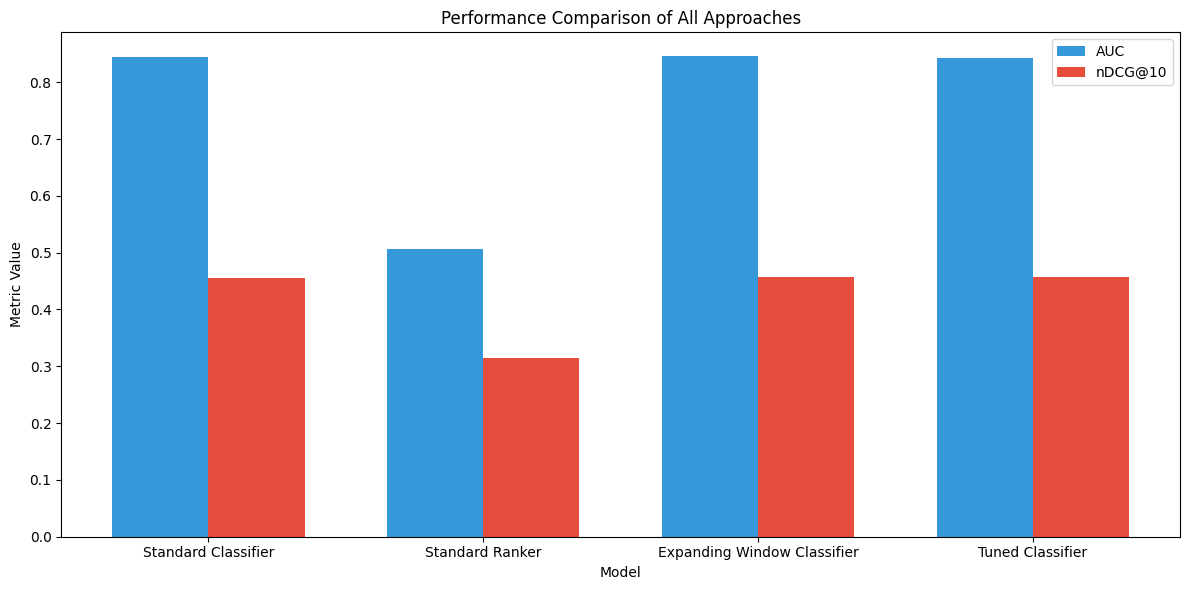

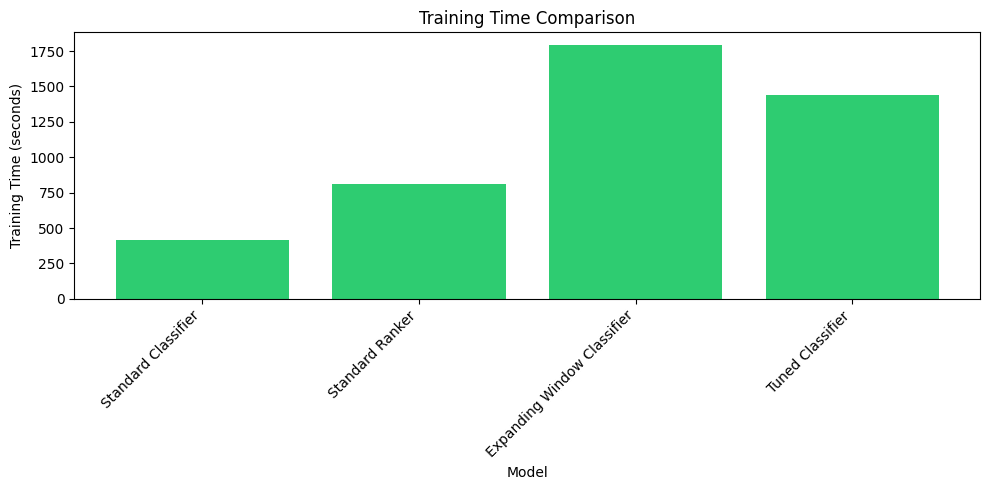

In [36]:
# Visualize comparison of auc and ndcg@10 metrics
plt.figure(figsize=(12, 6))

# Get metrics for plotting
models = all_models_comparison['Model']
auc_values = all_models_comparison.get('auc', [0, 0, 0, 0])
ndcg_values = all_models_comparison.get('ndcg@10', [0, 0, 0, 0])

# Set up the bar plot
x = range(len(models))
width = 0.35

plt.bar(x, auc_values, width, label='AUC', color='#3498db')
plt.bar([i + width for i in x], ndcg_values, width, label='nDCG@10', color='#e74c3c')

plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Performance Comparison of All Approaches')
plt.xticks([i + width/2 for i in x], models)
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig(f"{results_dir}/all_models_comparison.png", dpi=300)
plt.show()

# Display the training times as well
plt.figure(figsize=(10, 5))
plt.bar(models, all_models_comparison['Training Time (s)'], color='#2ecc71')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig(f"{results_dir}/training_time_comparison.png", dpi=300)
plt.show()